I. Información general en relación al dataset y las caracteristicas :



1.  Carga de las bibliotecas necesarias

In [1]:
pip install Kneed

In [88]:
# Importacion de bibliotecas

import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib import style
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import seaborn as sns
from sklearn.mixture import GaussianMixture #GMM
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
import argparse
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from kneed import KneeLocator
import plotly.graph_objects as go 
from plotly.subplots import make_subplots

Importar el Dataset

In [3]:
data = pd.read_csv ("/content/drive/MyDrive/Data Sets/all_seasons.csv")

In [4]:
data.head(5)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


Exploracion del Dataset

In [5]:
data.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,11700.0,5849.500000,3377.643409,0.000000,2924.7500,5849.50000,8774.25000,11699.00000
age,11700.0,27.131966,4.340006,18.000000,24.0000,26.00000,30.00000,44.00000
player_height,11700.0,200.728501,9.169827,160.020000,193.0400,200.66000,208.28000,231.14000
player_weight,11700.0,100.526791,12.526481,60.327736,90.7184,99.79024,108.86208,163.29312
gp,11700.0,51.717179,24.985236,1.000000,32.0000,58.00000,74.00000,85.00000
pts,11700.0,8.169299,5.956115,0.000000,3.6000,6.70000,11.50000,36.10000
reb,11700.0,3.564957,2.487498,0.000000,1.8000,3.00000,4.70000,16.30000
ast,11700.0,1.811179,1.792117,0.000000,0.6000,1.20000,2.40000,11.70000
net_rating,11700.0,-2.166410,12.076914,-200.000000,-6.3000,-1.30000,3.20000,300.00000
oreb_pct,11700.0,0.054981,0.043595,0.000000,0.0210,0.04200,0.08400,1.00000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11700 non-null  int64  
 1   player_name        11700 non-null  object 
 2   team_abbreviation  11700 non-null  object 
 3   age                11700 non-null  float64
 4   player_height      11700 non-null  float64
 5   player_weight      11700 non-null  float64
 6   college            11700 non-null  object 
 7   country            11700 non-null  object 
 8   draft_year         11700 non-null  object 
 9   draft_round        11700 non-null  object 
 10  draft_number       11700 non-null  object 
 11  gp                 11700 non-null  int64  
 12  pts                11700 non-null  float64
 13  reb                11700 non-null  float64
 14  ast                11700 non-null  float64
 15  net_rating         11700 non-null  float64
 16  oreb_pct           117

In [8]:
data.isnull().sum()

Unnamed: 0           0
player_name          0
team_abbreviation    0
age                  0
player_height        0
player_weight        0
college              0
country              0
draft_year           0
draft_round          0
draft_number         0
gp                   0
pts                  0
reb                  0
ast                  0
net_rating           0
oreb_pct             0
dreb_pct             0
usg_pct              0
ts_pct               0
ast_pct              0
season               0
dtype: int64

# Descripcion de las Variables del Data set
1.   **player_name** : Name of the player
2.   **team_abbreviation** : Abbreviated name of the team the player played for (at the end of the season) 
**ATL**	- Atlanta Hawks **BOS**	- Boston Celtics
**CHA**	- Charlotte Hornets
**CHI**	- Chicago Bulls
**CLE**	- Cleveland Cavaliers
**DAL**	- Dallas Mavericks
**DEN**	- Denver Nuggets
**DET**	- Detroit Pistons
**GSW**	- Golden State Warriors
**HOU** -	Houston Rockets
**IND**	- Indiana Pacers
**LAC** -	Los Angeles Clippers
**LAL**	- Los Angeles Lakers
**MEM**	- Memphis Grizzlies
**MIA**	- Miami Heat
**MIL**	- Milwaukee Bucks
**MIN**	- Minnesota Timberwolves
**NOH**	- New Orleans Pelicans
**NYK**	- New York Knicks
**BKN**	- Brooklyn Nets
**OKC**	- Oklahoma City Thunder
**ORL**	- Orlando Magic
**PHI**	- Philadelphia 76ers
**PHO**	- Phoenix Suns
**POR**	- Portland Trail Blazers
**SAC**	- Sacramento Kings
**TOR**	- Toronto Raptors
**UTH**	- Utah Jazz
**WAS**	- Washington Wizards
3.   age
4.   **player_height** : Height of the player (in centimeters)
5.   **player_weight** : Weight of the player (in kilograms)
6.   **college** : Name of the college the player attended
7.   **country** : Name of the country the player was born 
8.   **draft_year** : The year the player was drafted
9.   **draft_round** : The draft round the player was picked
10.  **draft_number** : The number at which the player was picked in his draft round
11.  **gp** : Games played throughout the season
12.  **pts** : Average number of points scored
13.  **reb** : Average number of rebounds grabbed
14.  **ast** : Average number of assists distributed
15.  **net_rating** : Team's point differential per 100 possessions while the player is on the court
16.  **oreb_pct** : Percentage of available offensive rebounds the player grabbed while he was on the floor
17.  **dreb_pct** : Percentage of available defensive rebounds the player grabbed while he was on the floor
18.  **usg_pct** : Percentage of team plays used by the player while he was on the floor 
19.  **ts_pct** : Measure of the player's shooting efficiency that takes into account free throws, 2 and 3 point shots (PTS / (2*(FGA +
20.  **ast_pct** : Percentage of teammate field goals the player assisted while he was on the floor
21.  **season**

## EDA - Analisis Exploratorio de Datos

In [9]:
data1 = data.copy()  # se realiza una copia del data set para el proceso del EDA y para transformaciones futuras

In [10]:
data1.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,Undrafted,71,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,Undrafted,74,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,25,42,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


## Players Names

In [11]:
data1["player_name"]

0              Travis Knight
1                  Matt Fish
2               Matt Bullard
3               Marty Conlon
4            Martin Muursepp
                ...         
11695    Matthew Dellavedova
11696       Maurice Harkless
11697              Max Strus
11698      Marcus Morris Sr.
11699           Aaron Gordon
Name: player_name, Length: 11700, dtype: object

In [12]:
data1["player_name"].mode()

0    Vince Carter
dtype: object

In [13]:
data1["player_name"].describe()

count            11700
unique            2333
top       Vince Carter
freq                22
Name: player_name, dtype: object

In [14]:
data1.groupby("player_name").size() 

player_name
A.C. Green             5
A.J. Bramlett          1
A.J. Guyton            3
AJ Hammons             1
AJ Price               6
                      ..
Zion Williamson        2
Zoran Dragic           1
Zoran Planinic         3
Zydrunas Ilgauskas    13
Zylan Cheatham         1
Length: 2333, dtype: int64

Teams : team_abbreviation

In [15]:
data1["team_abbreviation"]

0        LAL
1        MIA
2        HOU
3        BOS
4        DAL
        ... 
11695    CLE
11696    SAC
11697    MIA
11698    LAC
11699    DEN
Name: team_abbreviation, Length: 11700, dtype: object

In [16]:
data1["team_abbreviation"].mode()

0    CLE
dtype: object

In [17]:
data1["team_abbreviation"].describe()

count     11700
unique       36
top         CLE
freq        411
Name: team_abbreviation, dtype: object

In [18]:
data1["team_abbreviation"].unique()

array(['LAL', 'MIA', 'HOU', 'BOS', 'DAL', 'TOR', 'CLE', 'GSW', 'IND',
       'PHI', 'PHX', 'POR', 'LAC', 'CHH', 'SAC', 'CHI', 'NYK', 'DET',
       'ORL', 'SEA', 'WAS', 'VAN', 'SAS', 'ATL', 'NJN', 'UTA', 'MIL',
       'DEN', 'MIN', 'MEM', 'NOH', 'CHA', 'NOK', 'OKC', 'BKN', 'NOP'],
      dtype=object)

## age

In [19]:
data1["age"]

0        22.0
1        27.0
2        30.0
3        29.0
4        22.0
         ... 
11695    30.0
11696    28.0
11697    25.0
11698    31.0
11699    25.0
Name: age, Length: 11700, dtype: float64

In [20]:
data1["age"].describe()

count    11700.000000
mean        27.131966
std          4.340006
min         18.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

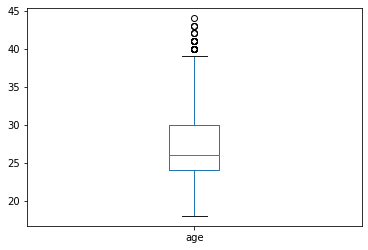

In [21]:
data1["age"].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

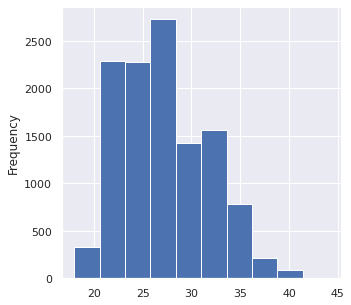

In [22]:
data1["age"].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

## player_height

In [23]:
data1["player_height"].describe()

count    11700.000000
mean       200.728501
std          9.169827
min        160.020000
25%        193.040000
50%        200.660000
75%        208.280000
max        231.140000
Name: player_height, dtype: float64

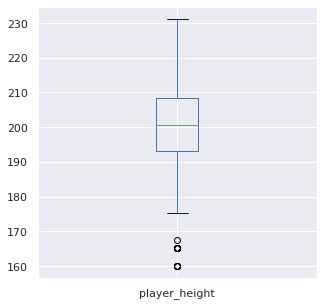

In [24]:
data1["player_height"].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

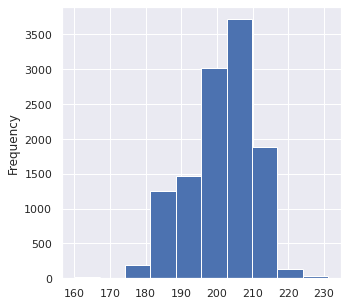

In [25]:
data1["player_height"].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

## player_weight

In [26]:
data1["player_weight"].describe()

count    11700.000000
mean       100.526791
std         12.526481
min         60.327736
25%         90.718400
50%         99.790240
75%        108.862080
max        163.293120
Name: player_weight, dtype: float64

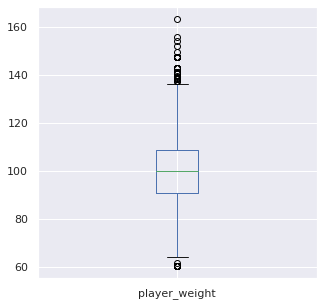

In [27]:
data1["player_weight"].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

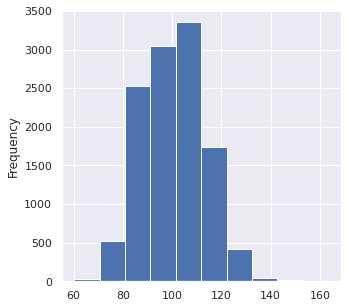

In [28]:
data1["player_weight"].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

## college

In [29]:
data1["college"].describe()

count     11700
unique      336
top        None
freq       1715
Name: college, dtype: object

In [30]:
data1["college"].head(15)

0                         Connecticut
1           North Carolina-Wilmington
2                                Iowa
3                          Providence
4                                None
5     Seward County Community College
6                        Old Dominion
7                              Temple
8                        Georgia Tech
9                     St. John's (NY)
10                   Washington State
11                         Texas Tech
12                         Seton Hall
13                               None
14             American International
Name: college, dtype: object

## Season

In [31]:
data1["season"].describe()

count       11700
unique         25
top       2017-18
freq          540
Name: season, dtype: object

GP : Games played throughout the season

In [32]:
data1["gp"].describe()

count    11700.000000
mean        51.717179
std         24.985236
min          1.000000
25%         32.000000
50%         58.000000
75%         74.000000
max         85.000000
Name: gp, dtype: float64

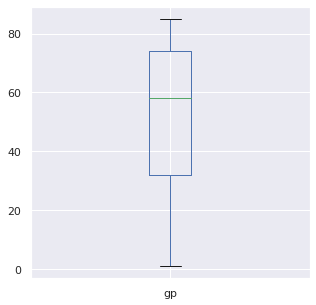

In [33]:
data1["gp"].plot(kind='box') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show()

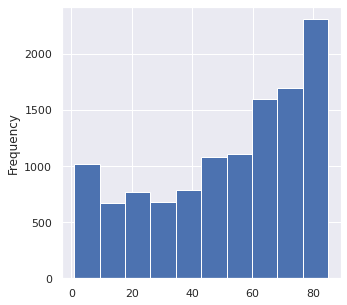

In [34]:
data1["gp"].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

PTS: Average number of points scored

In [35]:
data1["pts"].describe()

count    11700.000000
mean         8.169299
std          5.956115
min          0.000000
25%          3.600000
50%          6.700000
75%         11.500000
max         36.100000
Name: pts, dtype: float64

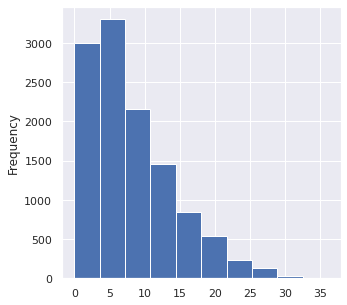

In [36]:
data1["pts"].plot(kind='hist') 
sns.set(rc={'figure.figsize':(5,5)}) 
plt.show() 

In [37]:
data2 = data.copy() 

In [38]:
data2.head(1)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97


In [39]:
data2 = data2.iloc[:,[3,4,5,8,9,10,11,12,13,14,15,16,17,18,19,20]]

In [40]:
data2.head(2)

,age,player_height,player_weight,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
0,22.0,213.36,106.59412,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052
1,27.0,210.82,106.59412,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000


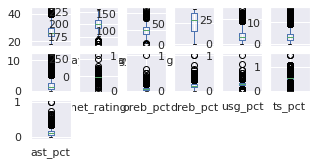

In [41]:
data2.plot(kind='box',subplots=True, layout=(6,6), sharex=False, sharey=False)
sns.set(rc={'figure.figsize':(18,18)})
plt.show() 

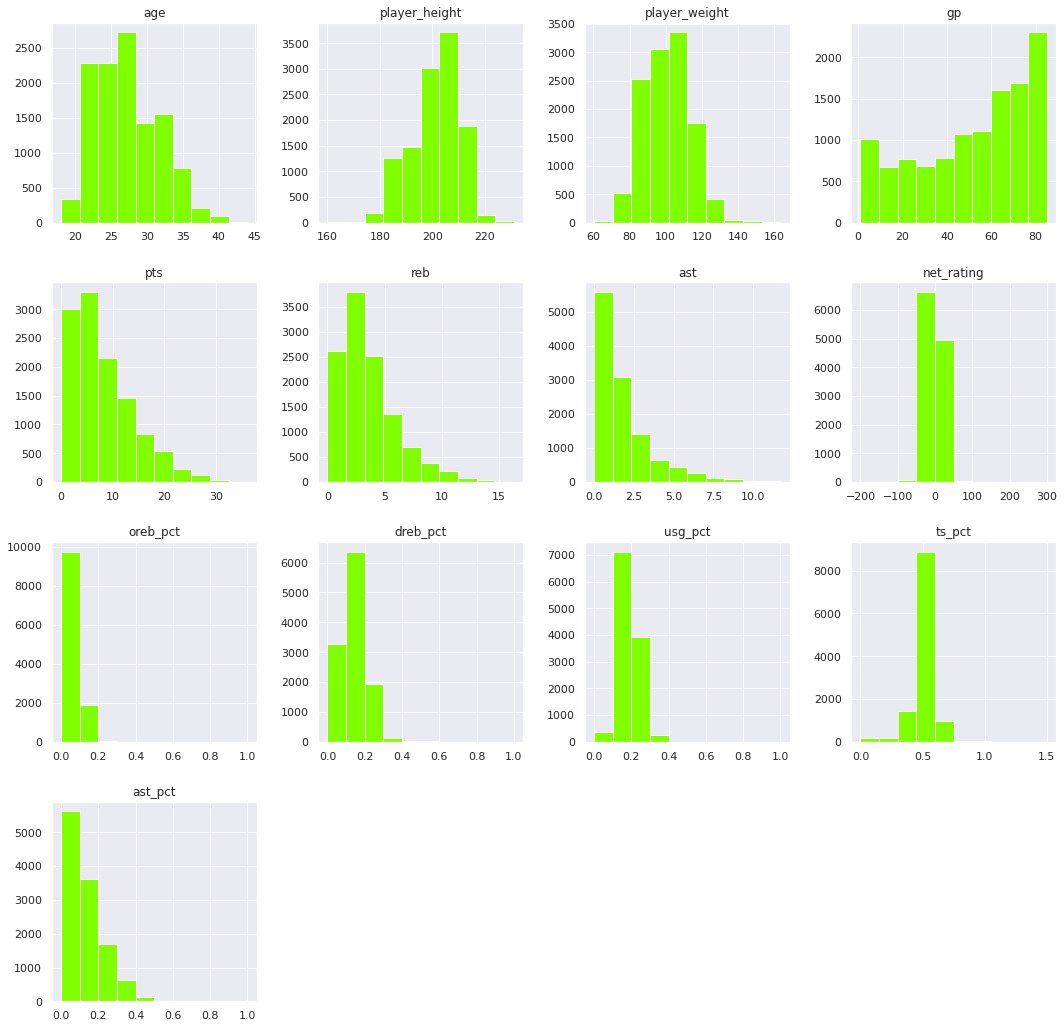

In [42]:
data2.hist(color = 'chartreuse')
plt.show() 

# Pivote Tables

## Tabla Pivote por Rangos de Edad

In [43]:
data1['age_range'] = (data1['age']//2)*2   

In [44]:
data1['age_range']

0        22.0
1        26.0
2        30.0
3        28.0
4        22.0
         ... 
11695    30.0
11696    28.0
11697    24.0
11698    30.0
11699    24.0
Name: age_range, Length: 11700, dtype: float64

In [45]:
round(data1.pivot_table(["player_weight"],['age_range'],aggfunc= 'mean',fill_value=0),2)

,player_weight
age_range,
18.0,101.62
20.0,99.66
22.0,99.81
24.0,99.87
26.0,100.62
28.0,100.94
30.0,101.08
32.0,100.97
34.0,101.15


In [46]:
round(data1.pivot_table(["pts"],['age_range'],aggfunc= 'mean',fill_value=0),2)

,pts
age_range,
18.0,6.55
20.0,7.75
22.0,7.38
24.0,7.86
26.0,9.04
28.0,9.28
30.0,8.79
32.0,7.84
34.0,7.43


In [47]:
data1.head(2)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_range
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,29,71,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97,22.0
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,50,6,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97,26.0


## Tabla Pivote por Pts

In [48]:
players_01 = data.iloc[:,[12,1,2,3,6,7,11,13,14,8,20]]

In [49]:
Pts_sort = players_01.sort_values('pts',ascending=False)
Pts_sort.head(20)

,pts,player_name,team_abbreviation,age,college,country,gp,reb,ast,draft_year,ast_pct
10507,36.1,James Harden,HOU,29.0,Arizona State,USA,78,6.6,7.5,2009,0.394
4348,35.4,Kobe Bryant,LAL,27.0,None,USA,80,5.3,4.5,1996,0.228
10750,34.3,James Harden,HOU,30.0,Arizona State,USA,68,6.6,7.5,2009,0.366
4007,33.0,Allen Iverson,PHI,31.0,Georgetown,USA,72,3.2,7.4,1996,0.331
2747,32.1,Tracy McGrady,ORL,24.0,None,USA,75,6.5,5.5,1997,0.282
11535,32.0,Stephen Curry,GSW,33.0,Davidson,USA,63,5.5,5.8,2009,0.283
7952,32.0,Kevin Durant,OKC,25.0,Texas,USA,81,7.4,5.5,2007,0.259
4835,31.6,Kobe Bryant,LAL,28.0,None,USA,77,5.7,5.4,1996,0.249
9305,31.6,Russell Westbrook,OKC,28.0,UCLA,USA,81,10.7,10.4,2008,0.543
2631,31.4,Allen Iverson,PHI,27.0,Georgetown,USA,60,4.5,5.5,1996,0.266


## Tabla Pivote por reb

In [50]:
players_02 = data.iloc[:,[13,1,2,3,6,7,11,12,14,8,20]]

In [51]:
reb_sort = players_02.sort_values('reb',ascending=False)
reb_sort.head(20)

,reb,player_name,team_abbreviation,age,college,country,gp,pts,ast,draft_year,ast_pct
2152,16.3,Danny Fortson,GSW,25.0,Cincinnati,USA,6,16.7,0.8,1997,0.042
411,16.1,Dennis Rodman,CHI,36.0,Southeastern Oklahoma State,USA,55,5.7,3.1,1986,0.113
10053,16.0,Andre Drummond,DET,24.0,Connecticut,USA,78,15.0,3.0,2012,0.140
10361,15.6,Andre Drummond,DET,25.0,Connecticut,USA,79,17.3,1.4,2012,0.068
2951,15.4,Ben Wallace,DET,28.0,Virginia Union,USA,73,6.9,1.6,Undrafted,0.069
10812,15.2,Andre Drummond,CLE,26.0,Connecticut,USA,57,17.7,2.7,2012,0.133
9706,15.2,DeAndre Jordan,LAC,29.0,Texas A&M,USA,77,12.0,1.5,2008,0.074
6295,15.2,Kevin Love,MIN,22.0,UCLA,USA,73,20.2,2.5,2008,0.116
492,15.0,Dennis Rodman,CHI,37.0,Southeastern Oklahoma State,USA,80,4.7,2.9,1986,0.112
8572,15.0,DeAndre Jordan,LAC,26.0,Texas A&M,USA,82,11.5,0.7,2008,0.030


## Tabla Pivote por gp

In [52]:
players_03 = data.iloc[:,[11,1,2,3,6,7,12,13,14,8,20]]

In [53]:
gp_sort = players_03.sort_values('gp',ascending=False)
gp_sort.head(20)

,gp,player_name,team_abbreviation,age,college,country,pts,reb,ast,draft_year,ast_pct
3191,85,Shareef Abdur-Rahim,POR,27.0,California,USA,16.3,7.5,2.0,1996,0.126
1725,85,Chris Gatling,DEN,32.0,Old Dominion,USA,11.9,5.9,0.8,1991,0.068
3236,85,Theo Ratliff,POR,31.0,Wyoming,USA,7.9,7.2,0.8,1995,0.043
3753,84,Casey Jacobsen,NOH,24.0,Stanford,USA,6.5,2.0,1.3,2002,0.102
300,83,A.C. Green,DAL,33.0,Oregon State,USA,7.2,7.9,0.8,1985,0.045
2387,83,Jalen Rose,CHI,29.0,Michigan,USA,20.4,4.5,4.3,1994,0.203
49,83,Michael Finley,DAL,24.0,Wisconsin,USA,15.0,4.5,2.7,1995,0.147
6620,83,Jarrett Jack,NOH,27.0,Georgia Tech,USA,8.9,2.1,2.9,2005,0.251
2966,83,James Posey,HOU,26.0,Xavier,USA,10.8,5.1,2.2,1999,0.126
7629,83,Ramon Sessions,MIL,28.0,Nevada,USA,12.3,2.4,4.1,2007,0.258


## Tabla Pivote por ast

In [54]:
players_04 = data.iloc[:,[14,1,2,3,6,7,11,12,13,8,20]]

In [55]:
gp_sort = players_04.sort_values('ast',ascending=False)
gp_sort.head(20)

,ast,player_name,team_abbreviation,age,college,country,gp,pts,reb,draft_year,ast_pct
6951,11.7,Rajon Rondo,BOS,26.0,Kentucky,USA,53,11.9,4.8,2006,0.498
11450,11.7,Russell Westbrook,WAS,32.0,UCLA,USA,65,22.2,11.5,2008,0.477
8884,11.7,Rajon Rondo,SAC,30.0,Kentucky,USA,72,11.9,6.0,2006,0.473
5228,11.6,Chris Paul,NOH,23.0,Wake Forest,USA,80,21.1,4.0,2005,0.500
4628,11.6,Steve Nash,PHX,33.0,Santa Clara,Canada,76,18.6,3.5,1996,0.468
3646,11.5,Steve Nash,PHX,31.0,Santa Clara,Canada,75,15.5,3.3,1996,0.460
6357,11.4,Steve Nash,PHX,37.0,Santa Clara,Canada,75,14.7,3.5,1996,0.498
9,11.4,Mark Jackson,IND,32.0,St. John's (NY),USA,82,9.9,4.8,1987,0.464
6411,11.2,Rajon Rondo,BOS,25.0,Kentucky,USA,68,10.6,4.4,2006,0.448
9454,11.2,James Harden,HOU,27.0,Arizona State,USA,81,29.1,8.1,2009,0.505


## Tabla Pivote Michael Jordan & Dennis Rodman

In [56]:
players_05 = data1[data1.player_name.isin(["Michael Jordan","Dennis Rodman"])]

In [57]:
players_05

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_range
47,47,Michael Jordan,CHI,34.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,29.6,5.9,4.3,13.4,0.042,0.132,0.331,0.567,0.208,1996-97,34.0
411,411,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,55,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,36.0
492,492,Dennis Rodman,CHI,37.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,27,80,4.7,15.0,2.9,6.7,0.169,0.319,0.088,0.459,0.112,1997-98,36.0
854,854,Michael Jordan,CHI,35.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,28.7,5.8,3.5,8.5,0.047,0.125,0.336,0.533,0.174,1997-98,34.0
901,901,Dennis Rodman,LAL,38.0,200.66,95.254320,Southeastern Oklahoma State,USA,1986,2,27,23,2.1,11.2,1.3,-1.4,0.114,0.348,0.065,0.388,0.063,1998-99,38.0
1576,1576,Dennis Rodman,DAL,39.0,200.66,95.254320,Southeastern Oklahoma State,USA,1986,2,27,12,2.8,14.3,1.2,-7.1,0.136,0.351,0.064,0.457,0.046,1999-00,38.0
2422,2422,Michael Jordan,WAS,39.0,198.12,97.975872,North Carolina,USA,1984,1,3,60,22.9,5.7,5.2,-0.3,0.027,0.163,0.361,0.468,0.295,2001-02,38.0
2649,2649,Michael Jordan,WAS,40.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,20.0,6.1,3.8,0.0,0.028,0.167,0.288,0.491,0.207,2002-03,40.0


## Tabla Pivote Chicago Bulls

In [58]:
players_06 = data1[data1.team_abbreviation.isin(["CHI"])]

In [59]:
Bulls01 = players_06.sort_values('pts',ascending=False)
Bulls01.head(10)

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,age_range
47,47,Michael Jordan,CHI,34.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,29.6,5.9,4.3,13.4,0.042,0.132,0.331,0.567,0.208,1996-97,34.0
854,854,Michael Jordan,CHI,35.0,198.12,97.975872,North Carolina,USA,1984,1,3,82,28.7,5.8,3.5,8.5,0.047,0.125,0.336,0.533,0.174,1997-98,34.0
11163,11163,Zach LaVine,CHI,26.0,195.58,90.718400,UCLA,USA,2014,1,13,58,27.4,5.0,4.9,-0.8,0.018,0.121,0.302,0.634,0.225,2020-21,26.0
10986,10986,Zach LaVine,CHI,25.0,198.12,90.718400,UCLA,USA,2014,1,13,60,25.5,4.8,4.2,-4.4,0.019,0.125,0.312,0.568,0.218,2019-20,24.0
6639,6639,Derrick Rose,CHI,22.0,190.50,86.182480,Memphis,USA,2008,1,1,81,25.0,4.1,7.7,8.3,0.032,0.093,0.319,0.550,0.372,2010-11,22.0
9492,9492,Jimmy Butler,CHI,27.0,200.66,104.779752,Marquette,USA,2011,1,30,76,23.9,6.2,5.5,3.0,0.050,0.131,0.265,0.586,0.243,2016-17,26.0
10252,10252,Zach LaVine,CHI,24.0,195.58,90.718400,UCLA,USA,2014,1,13,63,23.7,4.7,4.5,-6.5,0.018,0.113,0.298,0.574,0.224,2018-19,24.0
11566,11566,Nikola Vucevic,CHI,30.0,210.82,117.933920,Southern California,Montenegro,2011,1,16,70,23.4,11.7,3.8,-7.0,0.059,0.289,0.292,0.560,0.207,2020-21,30.0
2973,2973,Jalen Rose,CHI,30.0,203.20,98.429464,Michigan,USA,1994,1,13,82,22.1,4.3,4.8,-6.4,0.023,0.092,0.274,0.508,0.209,2002-03,30.0
6837,6837,Derrick Rose,CHI,23.0,190.50,86.182480,Memphis,USA,2008,1,1,39,21.8,3.4,7.9,10.6,0.022,0.083,0.301,0.532,0.379,2011-12,22.0


## Tabla Pivote Players & pts

In [67]:
players_07 = data.iloc[:,[12,1,21]]

In [68]:
pts_sort1 = players_07.sort_values('pts',ascending=False)
pts_sort1.head(20)

,pts,player_name,season
10507,36.1,James Harden,2018-19
4348,35.4,Kobe Bryant,2005-06
10750,34.3,James Harden,2019-20
4007,33.0,Allen Iverson,2005-06
2747,32.1,Tracy McGrady,2002-03
11535,32.0,Stephen Curry,2020-21
7952,32.0,Kevin Durant,2013-14
4835,31.6,Kobe Bryant,2006-07
9305,31.6,Russell Westbrook,2016-17
2631,31.4,Allen Iverson,2001-02


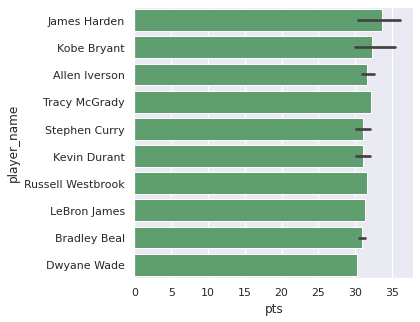

In [62]:
plot = plt.subplots(figsize=(5,5))
plot = sns.barplot(x = "pts", y ="player_name",data = pts_sort1.head(20),
            color = "g")

In [73]:
players_08 = data.iloc[:,[12,1,21]]

In [ ]:
pts_max = players_08.pivot_table

In [83]:
data.pivot_table(['pts'], index= 'season', aggfunc= 'max',fill_value=0)

,pts
season,
1996-97,29.6
1997-98,28.7
1998-99,26.8
1999-00,29.7
2000-01,31.1
2001-02,31.4
2002-03,32.1
2003-04,28.0
2004-05,30.7


<Figure size 720x720 with 0 Axes>

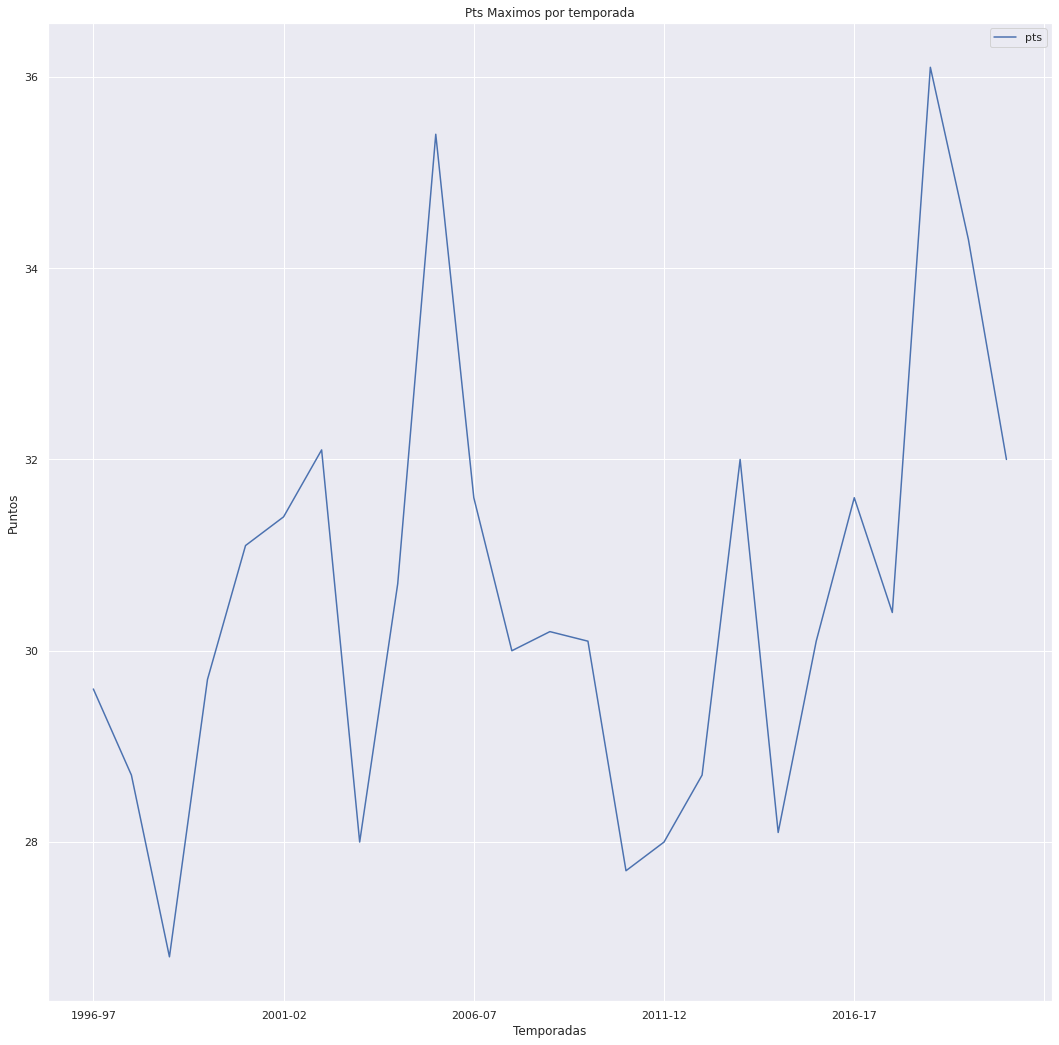

In [84]:
plt.figure(figsize = (10,10))
round(data.pivot_table(['pts'], index= 'season', aggfunc= 'max',fill_value=0),2).plot()
plt.title("Pts Maximos por temporada")
plt.ylabel("Puntos")
plt.xlabel("Temporadas")
plt.show();

## Pivote Table by Seasons

In [80]:
players_08.groupby(['season']).max()

,pts,player_name
season,,
1996-97,29.6,Zan Tabak
1997-98,28.7,Zydrunas Ilgauskas
1998-99,26.8,Zydrunas Ilgauskas
1999-00,29.7,Zan Tabak
2000-01,31.1,Zydrunas Ilgauskas
2001-02,31.4,Zydrunas Ilgauskas
2002-03,32.1,Zydrunas Ilgauskas
2003-04,28.0,Zydrunas Ilgauskas
2004-05,30.7,Zydrunas Ilgauskas


In [63]:
data1.pivot_table('pts', index= ["season"], aggfunc= "sum")

,pts
season,
1996-97,3539.5
1997-98,3489.0
1998-99,3230.4
1999-00,3497.8
2000-01,3444.8
2001-02,3512.4
2002-03,3359.5
2003-04,3423.5
2004-05,3752.9


<Figure size 720x720 with 0 Axes>

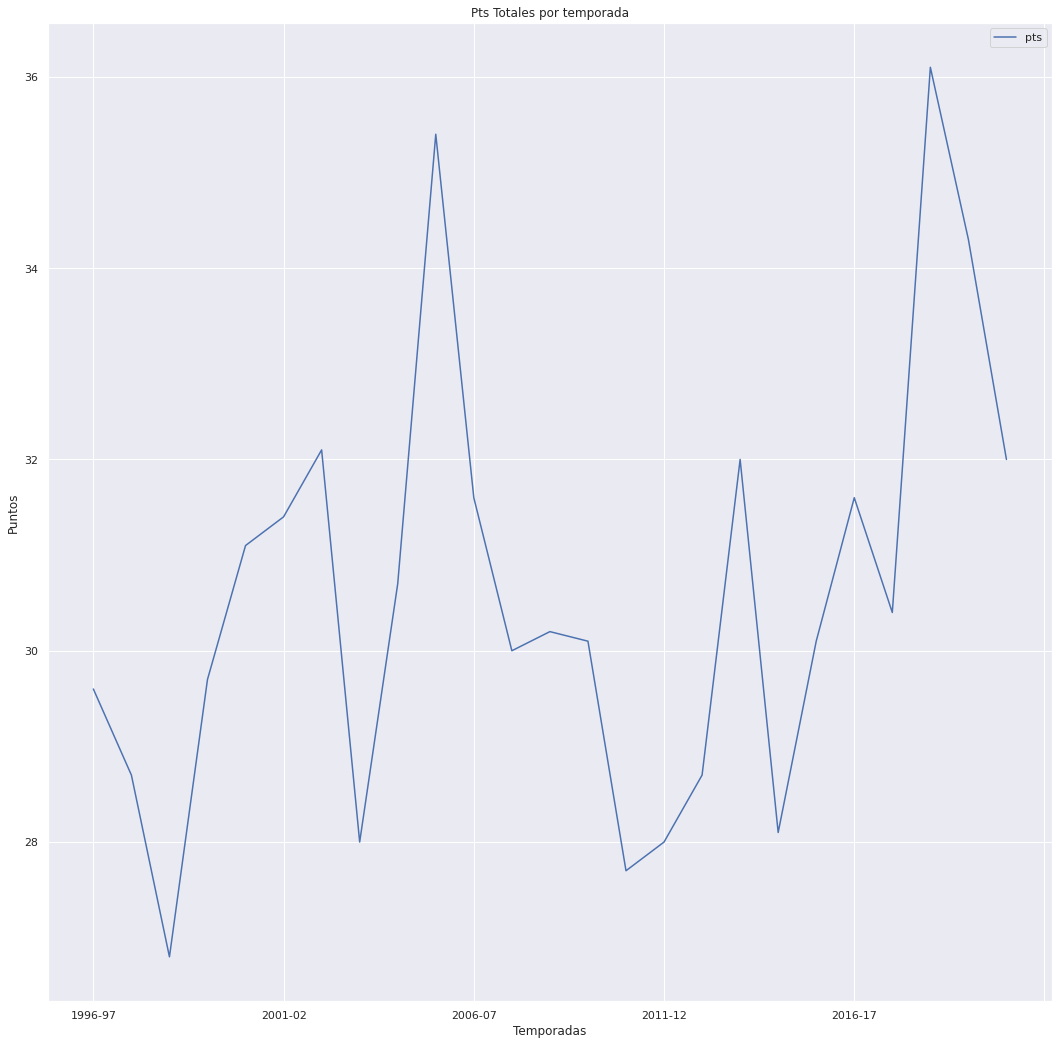

In [64]:
plt.figure(figsize = (10,10))
round(data1.pivot_table('pts', index= ["season"], aggfunc= "max"),2).plot()
plt.title("Pts Totales por temporada")
plt.ylabel("Puntos")
plt.xlabel("Temporadas")
plt.show();

## Otros Analisis del DataSET

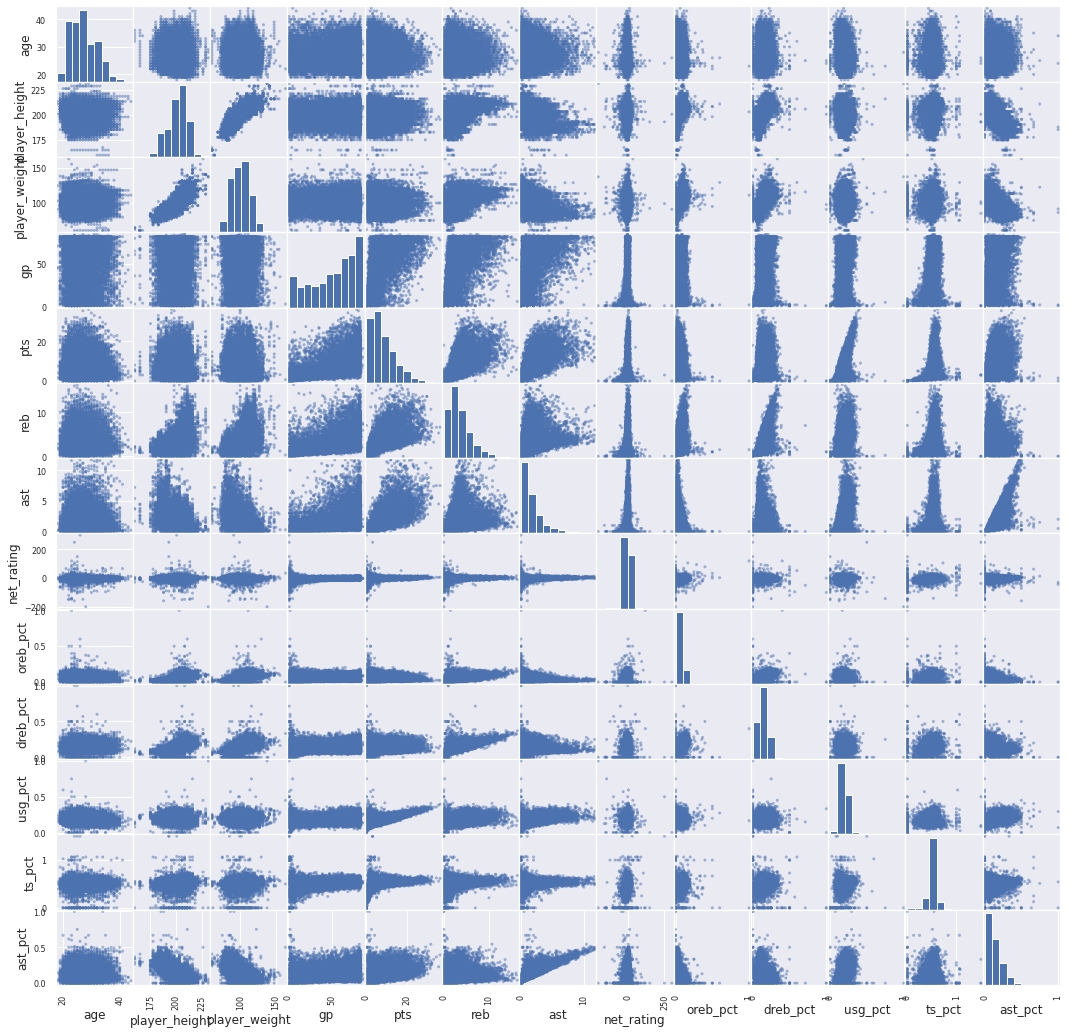

In [89]:
scatter_matrix(data2)
pyplot.show()

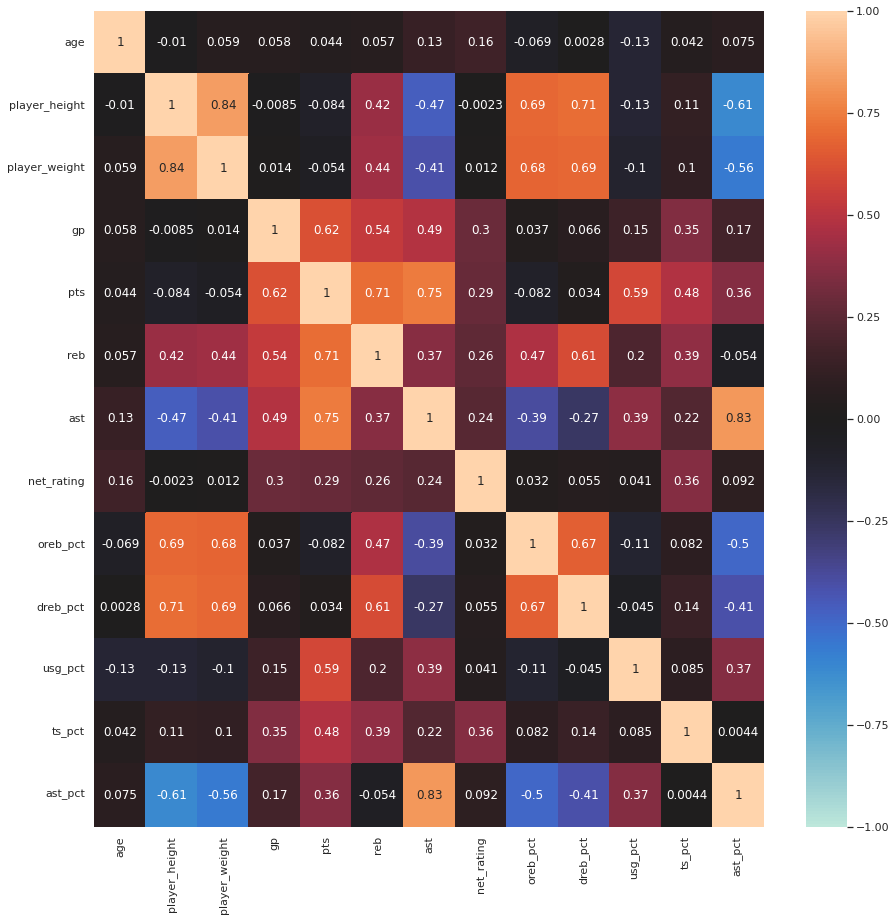

In [91]:
f,ax = plt.subplots(figsize=(15,15))
sns.heatmap(data2.corr(method='spearman'),annot=True,vmin=-1, vmax=1, center= 0)
plt.show()


Teams abreviation
https://gist.github.com/Tgemayel/e6e282b9aa538bb8b8b7